In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)

In [3]:
dataset.head(5)

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


### Step 3: Feature Scaling
Most of the data that are available usually are of varying ranges and magnitudes which makes building the model difficult. Thus, the range of the data needs to be normalized to a smaller range which enables the model to be more accurate when training. In this dataset, the data is normalized between to small values near zero. For example, the score of 87.23092513 is normalized to 1.00475931 and score of 53.45439421 is normalized to -1.22856288.

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

### Step 4: Training the Support Vector Regression model on the Training set
In building any ML model, we always need to split the data into the training set and the test set. The SVR Model will be trained with the values of the training set and the predictions are tested on the test set. Out of 100 rows, 80 rows are used for training and the model is tested on the remaining 20 rows as given by the condition, test_size=0.2

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Step 5: Training the Support Vector Regression model on the Training set
In this, the function SVM is imported and is assigned to the variable regressor. The kernel “rbf” (Radial Basis Function) is used. RBF kernel is used to introduce a non-linearity to the SVR model. This is done because our data is non-linear. The regressor.fit is used to fit the variables X_train and y_train by reshaping the data accordingly.

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Step 6: Predicting the Test set Results
In this step, we are going to predict the scores of the test set using the SVR model built. Theregressor.predict function is used to predict the values for the X_test. We assign the predicted values to y_pred. We now have two data, y_test (real values) and y_pred (predicted values).

In [8]:
y_pred = y_pred.reshape(-1, 1)
# y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

### Step 7: Comparing the Test Set with Predicted Values
In this step, we shall display the values of y_test as Real Values and y_pred values as Predicted Values for each X_test against each other in a Pandas DataFrame.

In [12]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1, 1))[:, 0], 'Predicted Values':y_pred.reshape(-1)})

In [13]:
df

,Real Values,Predicted Values
0,97.379897,82.557466
1,83.878565,94.435121
2,94.257102,95.356007
3,44.847124,58.496983
4,79.102830,60.353966
5,57.812513,62.091079
6,76.617341,61.339321
7,83.142750,79.955600
8,71.139728,79.701464
9,95.536687,80.084453


We can see that there is a significant deviation of the predicted values with the real values of the test set and hence we can conclude that this model is not the perfect fit for the following data.

### Step 8: Visualising the SVR results
In this last step, we shall visualize the SVR model that was built using the given data and plot the values of “y” and “y_pred” on the graph to visualize the results

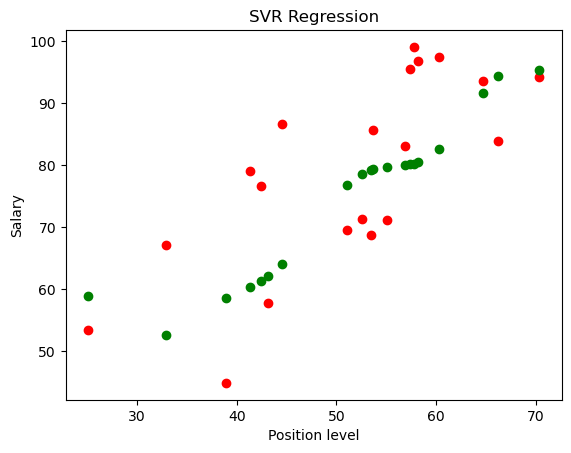

In [17]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test.reshape(-1, 1)), sc_y.inverse_transform(y_test.reshape(-1, 1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In this graph, the Real values are plotted in “Red” color and the Predicted values are plotted in “Green” color. The plot of the SVR model is also shown in “Black” color.

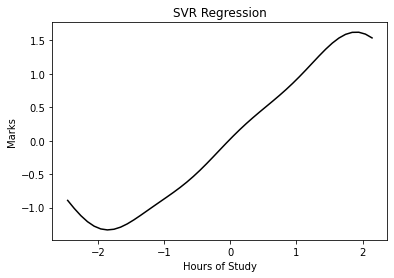